## Lecture 3 - Network Analysis

In [1]:
import numpy as np
import pandas as pd
import networkx as nx
from matplotlib import pyplot as plt

### 3. Steiner Trees

#### Steiner Graph Example

Steiner Tree Weight Sum: 10


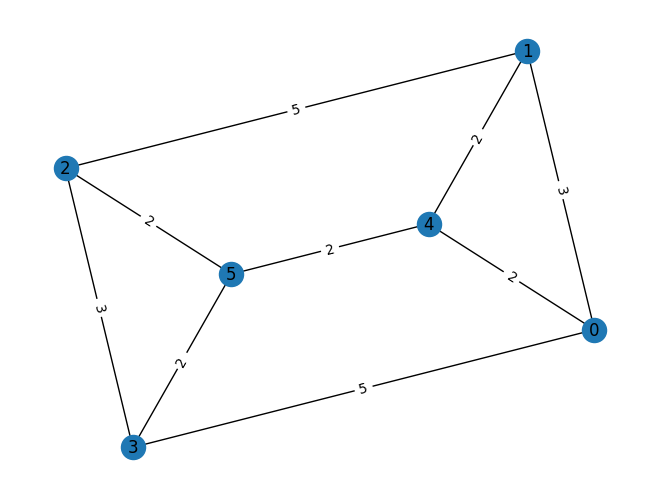

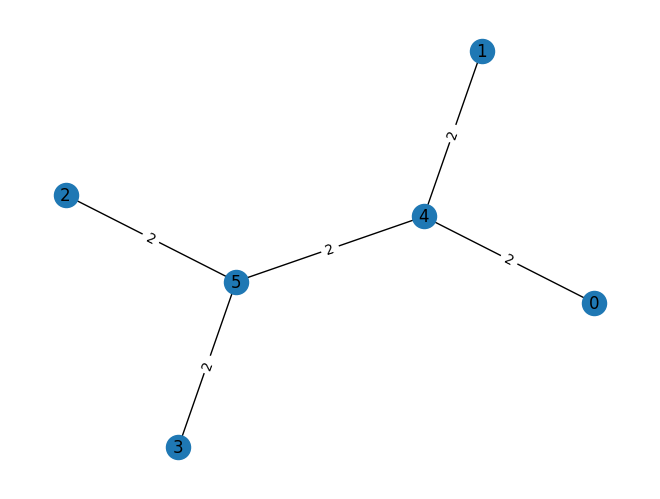

In [38]:
A = np.array([
    [0, 3, 0, 5, 2, 0],
    [3, 0, 5, 0, 2, 0],
    [0, 5, 0, 3, 0, 2],
    [5, 0, 3, 0, 0, 2],
    [2, 2, 0, 0, 0, 2],
    [0, 0, 2, 2, 2, 0],
])

# Create a graph from the adjacency matrix
G = nx.from_numpy_array(A, create_using=nx.Graph)

# Find the steiner tree
# All of the nodes are included, since if you add the weight of all of the edges
# with 4 nodes, you get a weight of 11. If you include both the 4th and 5th nodes,
# the weight decreases to 10. So, the steiner tree is the one that includes all of
# the nodes, since it "minimizes" the weight of the edges. 
T = nx.algorithms.approximation.steiner_tree(G, [0, 1, 2, 3, 4, 5])

# Get the sum of the weights of the edges in the steiner tree
steiner_tree_weight = sum([G[u][v]['weight'] for u, v in T.edges])
print("Steiner Tree Weight Sum:", steiner_tree_weight)

# Draw the graph
labels = nx.get_edge_attributes(G, 'weight')
pos = nx.kamada_kawai_layout(G)
nx.draw(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels)
plt.show()

# Draw the steiner tree
pos = nx.kamada_kawai_layout(T)
labels = nx.get_edge_attributes(T, 'weight')
nx.draw(T, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels)
plt.show()

#### Approximation to the Steiner Tree Problem

In [42]:
# Compute the distance matrix (D) for the adjacency matrix (A)
D = dict(nx.all_pairs_dijkstra_path_length(G))

# Convert the "D" dict to a numpy array
D = np.array([
    [D[i][j] for j in range(len(D))] for i in range(len(D))
])

# We are only interested in the first 4 nodes
D = D[:4, :4]
print("Distance Matrix:")
print(D)

Distance Matrix:
[[0 3 6 5]
 [3 0 5 6]
 [6 5 0 3]
 [5 6 3 0]]


#### Approximate Steiner Tree 2

Edge Weight Sum: 11.0


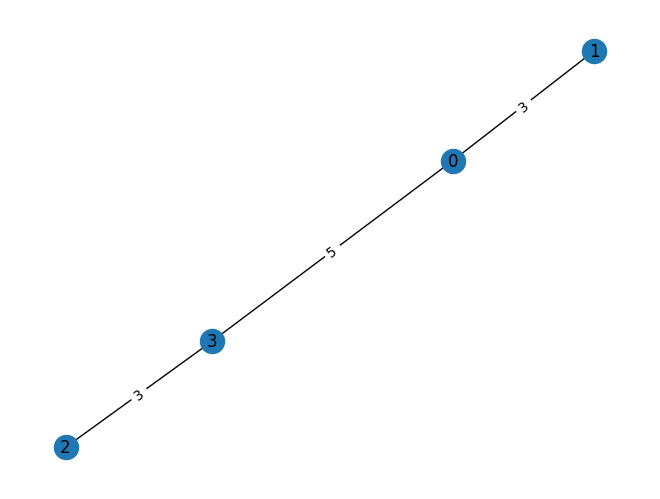

In [48]:
# Find the minimal spanning tree for the distance matrix
graphD = nx.from_numpy_array(D, create_using=nx.Graph)
T = nx.algorithms.tree.mst.minimum_spanning_tree(graphD)

# Get the sum of all the weight edges in the minimal spanning tree
print("Edge Weight Sum:", T.size(weight='weight'))

# Draw the minimal spanning tree
pos = nx.kamada_kawai_layout(T)
labels = nx.get_edge_attributes(T, 'weight')
nx.draw(T, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos=pos, edge_labels=labels)
plt.show()


----

### 4. A Few Practical Datasets

#### Food Delivery Workers

Co-worker Matrix:
[[3 0 3 0 1]
 [0 2 0 2 1]
 [3 0 3 0 1]
 [0 2 0 2 1]
 [1 1 1 1 2]]


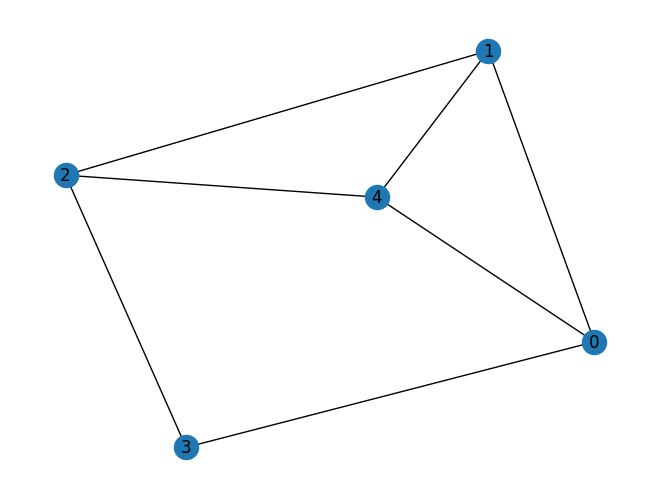

In [56]:
# Row: Represents an area
# Column: Represents a worker that works in food delivery
B = np.array([
    [0, 1, 0, 1, 1],
    [1, 0, 1, 0, 0],
    [0, 1, 0, 1, 1],
    [1, 0, 1, 0, 0],
    [0, 1, 1, 0, 0],
])
# i = 2, j = 0

# Create a graph from the adjacency matrix
G0 = nx.from_numpy_array(B, create_using=nx.Graph)

# Calculate the co-worker matrix
C = B @ B.T
print("Co-worker Matrix:")
print(C)

# ==================== PLOTS =================== #

# Draw the first graph
pos = nx.kamada_kawai_layout(G0)
nx.draw(G0, pos, with_labels=True)
plt.show()

#### Graph Laplacian - Example

Laplacian Matrix:
[[ 1 -1  0]
 [-1  1  0]
 [ 0  0  0]]
Number of Components: 2


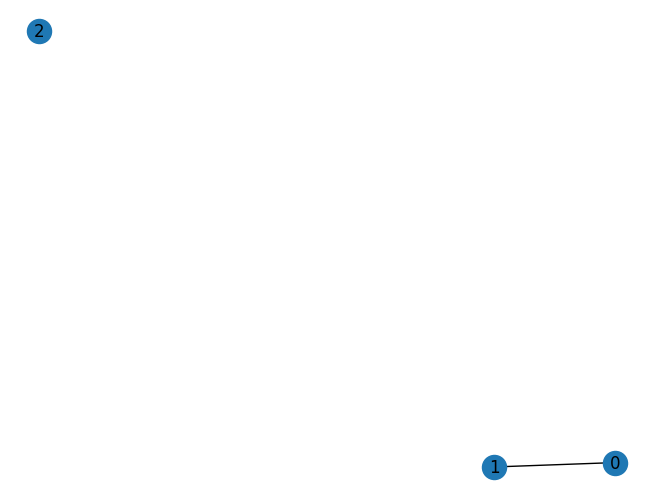

In [62]:
A = np.array([
    [0, 1, 0],
    [1, 0, 0],
    [0, 0, 0],
])

# Create a graph from the adjacency matrix
G = nx.from_numpy_array(A, create_using=nx.Graph)

# Create a degree matrix (Matrix where the off-diagonal elements are 0 and the
# diagonal elements are the degree of each node)
D = np.diag(np.sum(A, axis=1))

# Calculate the laplacian matrix
L = D - A
print("Laplacian Matrix:")
print(L)

# Find the number of components in the graph
print("Number of Components:", nx.number_connected_components(G))

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()

-----

### 6. Ideal Clustering

#### Number of Splits

In [68]:
# Total nodes in the graph
n = 25

# Size of subset A
k = 12

# Get the number of ways to choose k nodes from n nodes
combinations = np.math.factorial(n) / (np.math.factorial(k) * np.math.factorial(n - k))
print(f"Number of ways to choose {k} nodes from {n} nodes:", combinations)

# Get the number of ways you can partition a 25 node graph into 2 components
# (empty sets are valid subsets)
partitions = 2**n
print(f"Number of ways to partition a {n} node graph into 2 components:", partitions)

Number of ways to choose 12 nodes from 25 nodes: 5200300.0
Number of ways to partition a 25 node graph into 2 components: 33554432


----

### 7. Spectral Clustering

#### Spectral Clustering - I

Eigenvector: [-0.37147146 -0.33561673 -0.23497399 -0.33561673  0.01167124  0.25606344
  0.45102474  0.55891948]


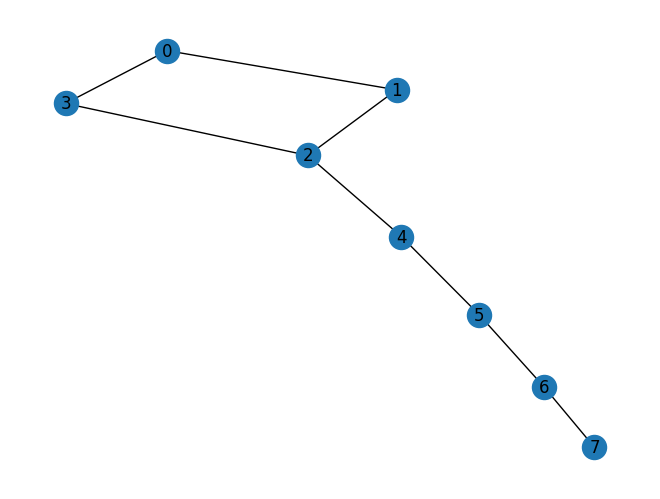

In [72]:
A = np.array([
    [0, 1, 0, 1, 0, 0, 0, 0],
    [1, 0, 1, 0, 0, 0, 0, 0],
    [0, 1, 0, 1, 1, 0, 0, 0],
    [1, 0, 1, 0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 1, 0, 0],
    [0, 0, 0, 0, 1, 0, 1, 0],
    [0, 0, 0, 0, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 1, 0]
])

# Create a graph from the adjacency matrix
G = nx.from_numpy_array(A, create_using=nx.Graph)

# Compute the eigenvector corresponding to the second smallest eigenvalue
eigenvector = nx.linalg.algebraicconnectivity.fiedler_vector(G)
print("Eigenvector:", eigenvector)

# Draw the graph
nx.draw(G, with_labels=True)
plt.show()